In [1]:
import nengo
import nengo_bio as bio
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def simulate_bio_network(p_exc, f=lambda x: x, T=10.0, bias_source=False):
    with nengo.Network(seed=4909) as model:
        nd_in = nengo.Node(nengo.processes.WhiteSignal(rms=0.5, high=2.0, period=T))
        ens_a = bio.Ensemble(n_neurons=101, dimensions=1, p_exc=p_exc)
        ens_b = bio.Ensemble(n_neurons=102, dimensions=1, seed=47891)
        if bias_source:
            ens_bias = bio.Ensemble(n_neurons=103, dimensions=1, p_exc=1.0)

        nengo.Connection(nd_in, ens_a)
        if bias_source:
            bio.Connection((ens_a, ens_bias), ens_b, function=lambda x: f(x[0]))
        else:
            bio.Connection(ens_a, ens_b, function=f)
        
        ens_b2 = bio.Ensemble(n_neurons=102, dimensions=1, seed=47891)
        nengo.Connection(ens_a, ens_b2)

        p_in = nengo.Probe(nd_in, synapse=10e-3)
        p_b = nengo.Probe(ens_b, synapse=10e-3)
        p_b2 = nengo.Probe(ens_b2, synapse=10e-3)

    with nengo.Simulator(model, progress_bar=None) as sim:
        sim.run(T)

    return sim.trange(), sim.data[p_in], sim.data[p_b], sim.data[p_b2]

In [9]:
ts, xs, ys_80, ys = simulate_bio_network(0.8)
_, _, ys_100, _ = simulate_bio_network(1.0)
_, _, ys_0, _ = simulate_bio_network(0.0)
_, _, ys_0_with_bias, _ = simulate_bio_network(0.0, bias_source=True)

Solved 102/102 neuron weights

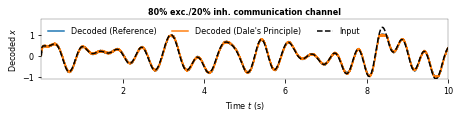

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(6.5, 1.75), sharex=True)

axs.plot(ts, ys, label='Decoded (Reference)')
axs.plot(ts, ys_80, label='Decoded (Dale\'s Principle)')
axs.plot(ts, xs, 'k--', label='Input')
axs.legend(ncol=3)
axs.set_title('80% exc./20% inh. communication channel')
axs.set_ylabel('Decoded $x$')
axs.set_ylim(-1.1, 1.75)
axs.set_xlabel('Time $t$ (s)')
axs.set_xlim(ts[0], ts[-1])

#axs[1].plot(ts, ys_100, label='Decoded')
#axs[1].plot(ts, xs, 'k--', label='Input')
#axs[1].legend(ncol=2)
#axs[1].set_title('(b) Purely excitatory communication channel')
#axs[1].set_ylabel('Decoded $x$')
#axs[1].set_ylim(-1.5, 1.5)

#axs[2].plot(ts, ys_0, label='Decoded')
#axs[2].plot(ts, xs, 'k--', label='Input')
#axs[2].legend(ncol=2)
#axs[2].set_title('(c) Purely inhibitory communication channel')
#axs[2].set_ylabel('Decoded $x$')
#axs[2].set_ylim(-1.5, 1.5)

#axs[3].plot(ts, ys_0_with_bias, label='Decoded')
#axs[3].plot(ts, xs, 'k--', label='Input')
#axs[3].legend(ncol=2)
#axs[3].set_title('(d) Purely inhibitory communication channel with bias source')
#axs[3].set_ylabel('Decoded $x$')
#axs[3].set_ylim(-1.5, 1.5)
#axs[3].set_xlim(ts[0], ts[-1])
#axs[3].set_xlabel('Time $t$ (s)')

fig.tight_layout()
fig.savefig('../nengo_bio_communication_channel.pdf', transparent=True, bbox_inches='tight')

In [38]:
f=lambda x: np.cos(x)
ts, xs, ys_80, ys = simulate_bio_network(0.8, f=f)
_, _, ys_100, _ = simulate_bio_network(1.0, f=f)
_, _, ys_0_with_bias, _ = simulate_bio_network(0.0, bias_source=True, f=f)

Solved 102/102 neuron weights

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

Solved 102/102 neuron weights

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

Solved 102/102 neuron weights

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

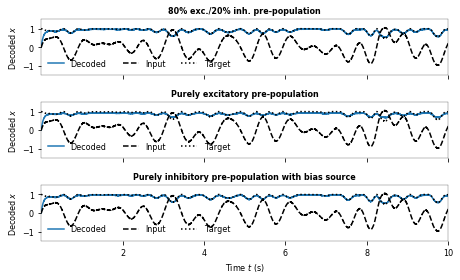

In [39]:
fig, axs = plt.subplots(3, 1, figsize=(6.5, 4.0), sharex=True)

axs[0].plot(ts, ys_80, label='Decoded')
axs[0].plot(ts, xs, 'k--', label='Input')
axs[0].plot(ts, f(xs), 'k:', label='Target')
axs[0].legend(ncol=3)
axs[0].set_title('80% exc./20% inh. pre-population')
axs[0].set_ylabel('Decoded $x$')
axs[0].set_ylim(-1.5, 1.5)

axs[1].plot(ts, ys_100, label='Decoded')
axs[1].plot(ts, xs, 'k--', label='Input')
axs[1].plot(ts, f(xs), 'k:', label='Target')
axs[1].legend(ncol=3)
axs[1].set_title('Purely excitatory pre-population')
axs[1].set_ylabel('Decoded $x$')
axs[1].set_ylim(-1.5, 1.5)

axs[2].plot(ts, ys_0_with_bias, label='Decoded')
axs[2].plot(ts, xs, 'k--', label='Input')
axs[2].plot(ts, f(xs), 'k:', label='Target')
axs[2].legend(ncol=3)
axs[2].set_title('Purely inhibitory pre-population with bias source')
axs[2].set_ylabel('Decoded $x$')
axs[2].set_ylim(-1.5, 1.5)
axs[2].set_xlim(ts[0], ts[-1])
axs[2].set_xlabel('Time $t$ (s)')

fig.tight_layout()
fig.savefig('../nengo_bio_square.pdf', transparent=True, bbox_inches='tight')